# 🌦️ Weather Data Analysis Using Python 📊

---

## 🎯 1. Project Objective
The objective of this project is to analyze **hourly weather data** to:
- 📈 Identify weather trends over time  
- 🔗 Understand relationships between weather parameters  
- 🌤️ Study seasonal and daily patterns  
- 📊 Extract meaningful insights using data visualization  

---

## 📁 2. Dataset Description
The weather dataset is a **time series dataset** with **hourly observations** for a specific location.  
It contains the following weather attributes:

- 🌡️ Temperature  
- 💧 Dew point temperature  
- 💦 Relative humidity  
- 🌬️ Wind speed  
- 👁️ Visibility  
- ⏲️ Pressure  
- ☁️ Weather conditions  

---

## 🧰 3. Tools & Libraries Used
The following Python libraries are used in this project:

- 🐼 Pandas  
- 🔢 NumPy  
- 📉 Matplotlib  
- 🎨 Seaborn  

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 4. Data Loading
The dataset is loaded into a Pandas DataFrame for analysis and processing.

---

In [3]:
data=pd.read_csv('Dataset.csv')
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


## 🔍 Data Understanding

Initial inspection is performed to understand:
- Dataset structure
- Data types
- Missing values
- Statistical distribution


# Dataset shape

In [4]:
data.shape

(366, 22)

# Dataset information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

# Statistical summary

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


## 🧹 Data Cleaning & Preprocessing

Steps performed:
- Convert Date/Time column to datetime format
- Set Date/Time as index
- Rename columns for clarity
- Handle missing values


# Check missing values

In [7]:
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

# Percentage of missing values

In [8]:
(data.isnull().sum() / len(data)) * 100

MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.819672
WindGustDir      0.819672
WindGustSpeed    0.546448
WindDir9am       8.469945
WindDir3pm       0.273224
WindSpeed9am     1.912568
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64

# Statistical summary

In [9]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


# Handling Categorical Variables
**Value counts for RainToday and RainTomorrow**

In [10]:
data['RainToday'].value_counts()

RainToday
No     300
Yes     66
Name: count, dtype: int64

In [11]:
data['RainTomorrow'].value_counts()

RainTomorrow
No     300
Yes     66
Name: count, dtype: int64

# Distribution of Temperature

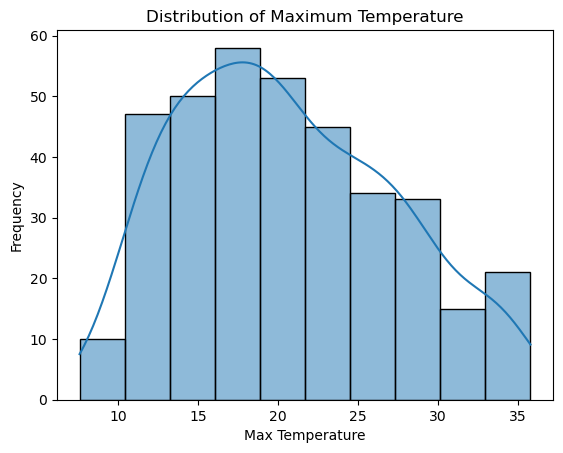

In [12]:
plt.figure()
sns.histplot(data['MaxTemp'], kde=True)
plt.title("Distribution of Maximum Temperature")
plt.xlabel("Max Temperature")
plt.ylabel("Frequency")
plt.show()

# Rain Today vs Rain Tomorrow

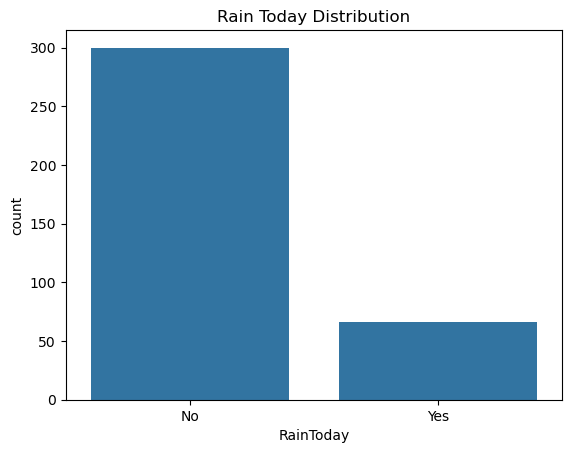

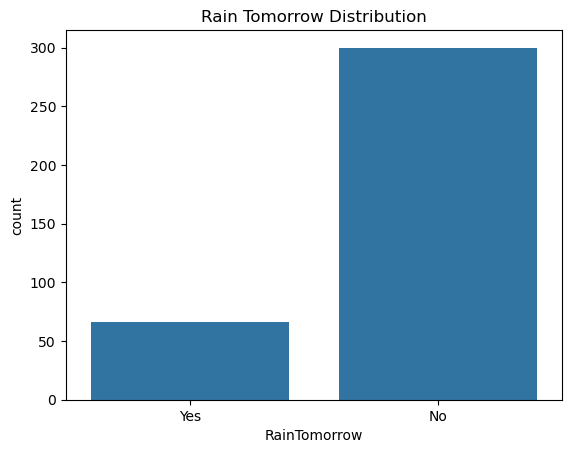

In [13]:
plt.figure()
sns.countplot(x='RainToday', data=data)
plt.title("Rain Today Distribution")
plt.show()


plt.figure()
sns.countplot(x='RainTomorrow', data=data)
plt.title("Rain Tomorrow Distribution")
plt.show()


# Humidity vs RainTomorrow

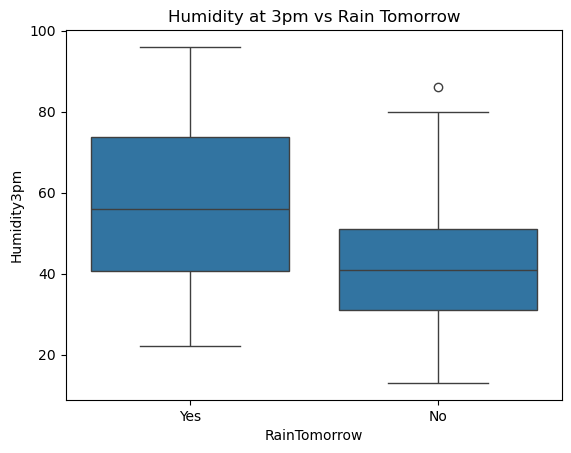

In [14]:
plt.figure()
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=data)
plt.title("Humidity at 3pm vs Rain Tomorrow")
plt.show()

# Pressure vs RainTomorrow

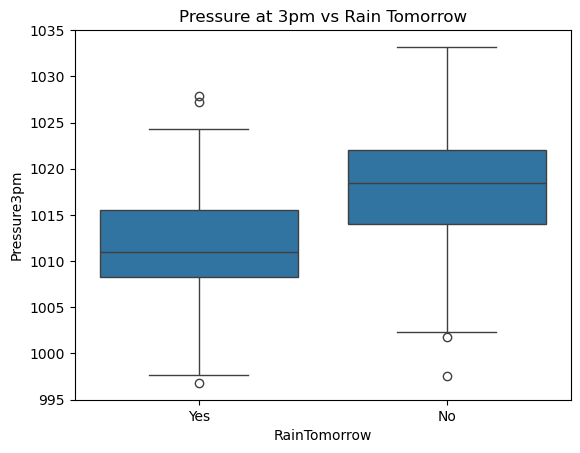

In [15]:
plt.figure()
sns.boxplot(x='RainTomorrow', y='Pressure3pm', data=data)
plt.title("Pressure at 3pm vs Rain Tomorrow")
plt.show()

# Correlation Heatmap

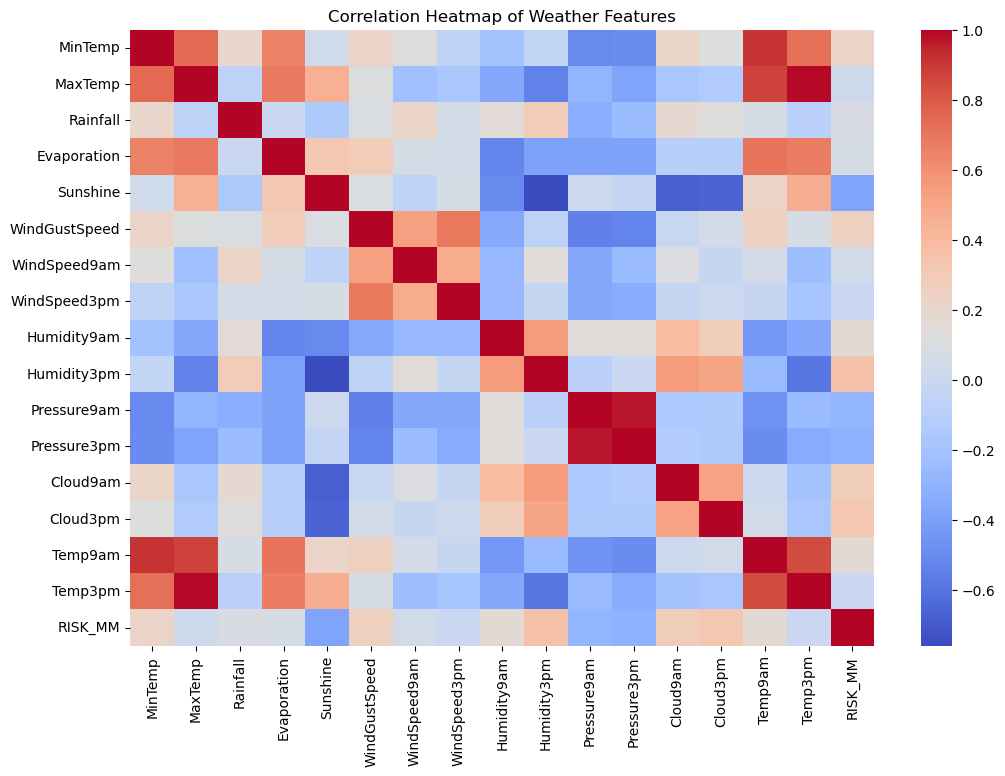

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Weather Features")
plt.show()

# Wind Speed Analysis

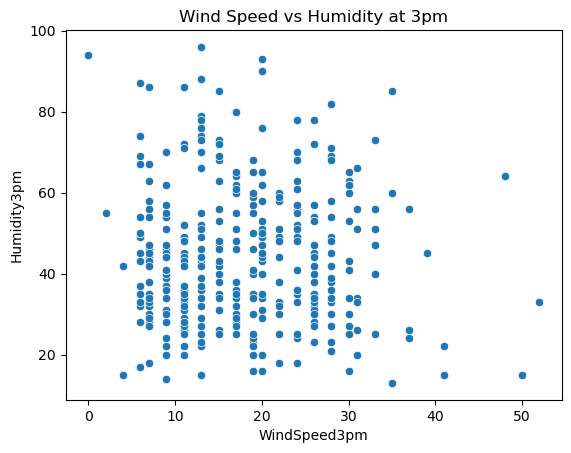

In [17]:
plt.figure()
sns.scatterplot(x='WindSpeed3pm', y='Humidity3pm', data=data)
plt.title("Wind Speed vs Humidity at 3pm")
plt.show()

# Rainfall Amount Distribution

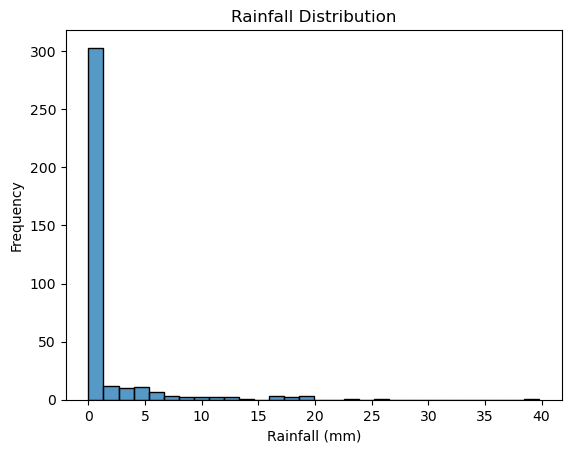

In [18]:
plt.figure()
sns.histplot(data['Rainfall'], bins=30)
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

## Key Insights

- Higher humidity levels significantly increase the chance of rainfall
- Lower atmospheric pressure is associated with rainy conditions
- RainToday has a strong influence on RainTomorrow
- Temperature alone is not a strong predictor of rainfall
- Wind speed has moderate influence on rainfall patterns


## Conclusion

This project successfully analyzed weather data using Python and extracted
important insights related to rainfall behavior.

The project demonstrates:
- Strong understanding of EDA techniques
- Ability to work with real-world datasets
- Effective use of visualization for insight extraction

This project is suitable for academic submission, resume showcase,
and interview discussions.


## Future Scope

- Build Machine Learning models to predict RainTomorrow
- Apply Logistic Regression and Random Forest
- Perform feature selection and scaling
- Evaluate model performance using accuracy and confusion matrix
